In [1]:
# Unzipping File
from zipfile import ZipFile
file_name = "/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping as ES
from IPython.display import clear_output as cls

import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Loading datasets
train_directory = "/content/tomato/train"
val_directory = "/content/tomato/val"

In [4]:
# Checking different classes
class_names = sorted(os.listdir(train_directory))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [5]:
# Rescaling to normalize pixel values between 0 and 1
train_generator = ImageDataGenerator(rescale=(1./255.), validation_split=0.2)
val_generator = ImageDataGenerator(rescale=(1./255.))

In [6]:
# Preparing train and validation data for real-time preprocessing
train_data = train_generator.flow_from_directory(train_directory,target_size=(224, 224),batch_size=32, subset='training', class_mode='categorical')
val_data = train_generator.flow_from_directory(train_directory,target_size=(224, 224),batch_size=32, subset='validation', class_mode='categorical')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
# Preparing test data for real-time preprocessing
test_data = val_generator.flow_from_directory(val_directory,target_size=(224,224),batch_size=32, class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [8]:
# Function for displaying sample images
def display_images(data, class_names):
    
    rows, cols = 2, 4
    num_images = rows * cols
    
    plt.figure(figsize=(20, 15))
    image_index = 1
    
    for images, labels in iter(data):
        image_id = np.random.randint(len(images))
        img = tf.expand_dims(images[image_id], axis=0)
        label = class_names[np.argmax(labels[image_id])]
        plt.subplot(rows, cols, image_index)
        plt.imshow(img[0])
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        image_index += 1
        if image_index > num_images:
            break
            
    plt.show()

<ipython-input-8-2dac8d20e267>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols, image_index)


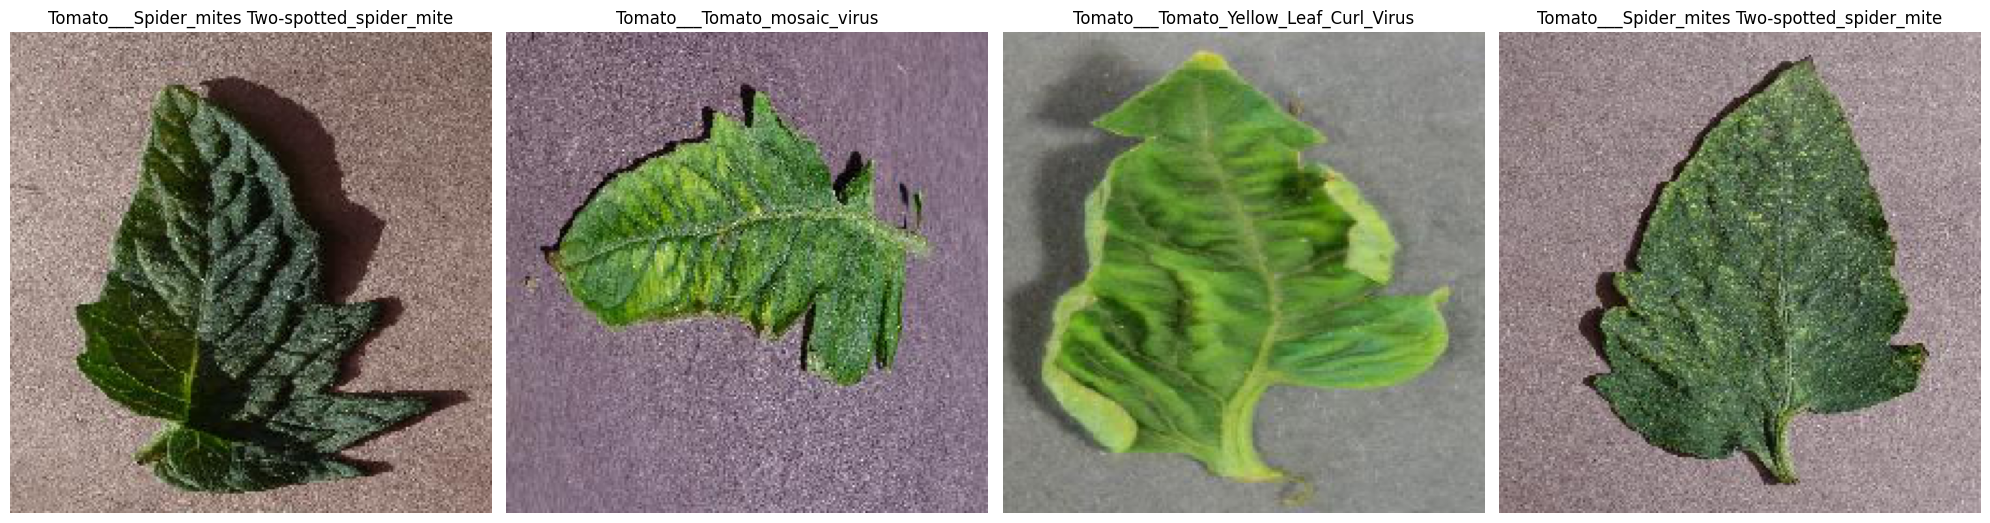

In [9]:
# Sample images
display_images(train_data, class_names)

In [15]:
# Model Architecture
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')
])

In [16]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [17]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data = val_data, epochs=10,
                   steps_per_epoch=len(train_data),
                   validation_steps=len(val_data))

Epoch 1/10
250/250 [==============================] - 32s 113ms/step - loss: 1.5953 - accuracy: 0.4371 - val_loss: 2.0804 - val_accuracy: 0.2515
Epoch 2/10
250/250 [==============================] - 28s 113ms/step - loss: 0.9199 - accuracy: 0.6885 - val_loss: 0.9899 - val_accuracy: 0.7065
Epoch 3/10
250/250 [==============================] - 28s 113ms/step - loss: 0.7157 - accuracy: 0.7602 - val_loss: 0.7579 - val_accuracy: 0.7650
Epoch 4/10
250/250 [==============================] - 27s 110ms/step - loss: 0.5328 - accuracy: 0.8220 - val_loss: 0.4314 - val_accuracy: 0.8600
Epoch 5/10
250/250 [==============================] - 28s 110ms/step - loss: 0.4475 - accuracy: 0.8539 - val_loss: 0.4519 - val_accuracy: 0.8400
Epoch 6/10
250/250 [==============================] - 27s 110ms/step - loss: 0.3553 - accuracy: 0.8867 - val_loss: 0.3149 - val_accuracy: 0.9010
Epoch 7/10
250/250 [==============================] - 28s 113ms/step - loss: 0.3147 - accuracy: 0.8984 - val_loss: 0.7897 - val_ac

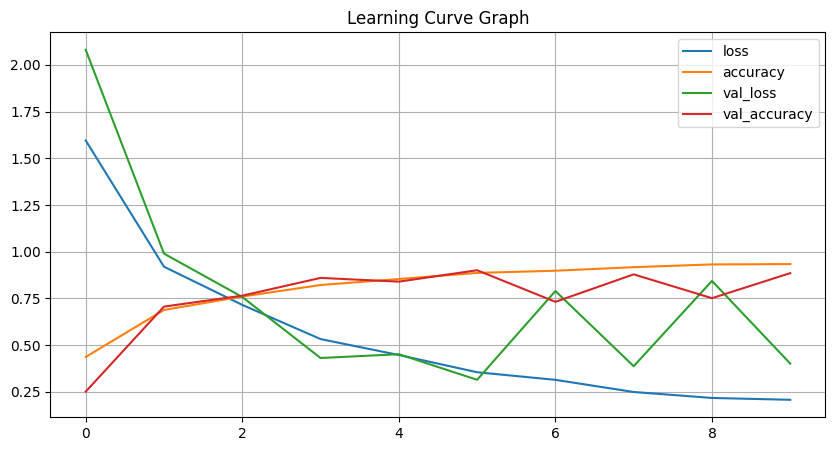

In [18]:
# Learning curve graph
learningcurve = pd.DataFrame(history.history)
learningcurve.plot(figsize=(10, 5))
plt.title("Learning Curve Graph")
plt.grid()

In [19]:
# Model performance on test data
score = model.evaluate_generator(test_data, steps=len(test_data))

print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-19-2b7bf642447d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_data, steps=len(test_data))


Test loss: 0.4358643591403961
Test accuracy: 0.8610000014305115


In [24]:
# Function for predicting the image label
def predict_image_label(data, class_names, model):
    
    rows, cols = 2, 3
    num_images = rows * cols

    plt.figure(figsize=(20, 15))
    index = 1
    
    for images, labels in iter(data):
        
        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)
        plt.subplot(rows, cols, index)
        plt.imshow(img[0])
        predicted = model.predict(img)
        predicted_class = class_names[np.argmax(predicted)]
        actual_class = class_names[np.argmax(labels[id])]
        plt.title(f"Actual Label: {actual_class}\nPredicted Label: {predicted_class}")
        plt.axis('off')
        cls()

        index += 1
        if index > num_images:
            break            
    plt.show()


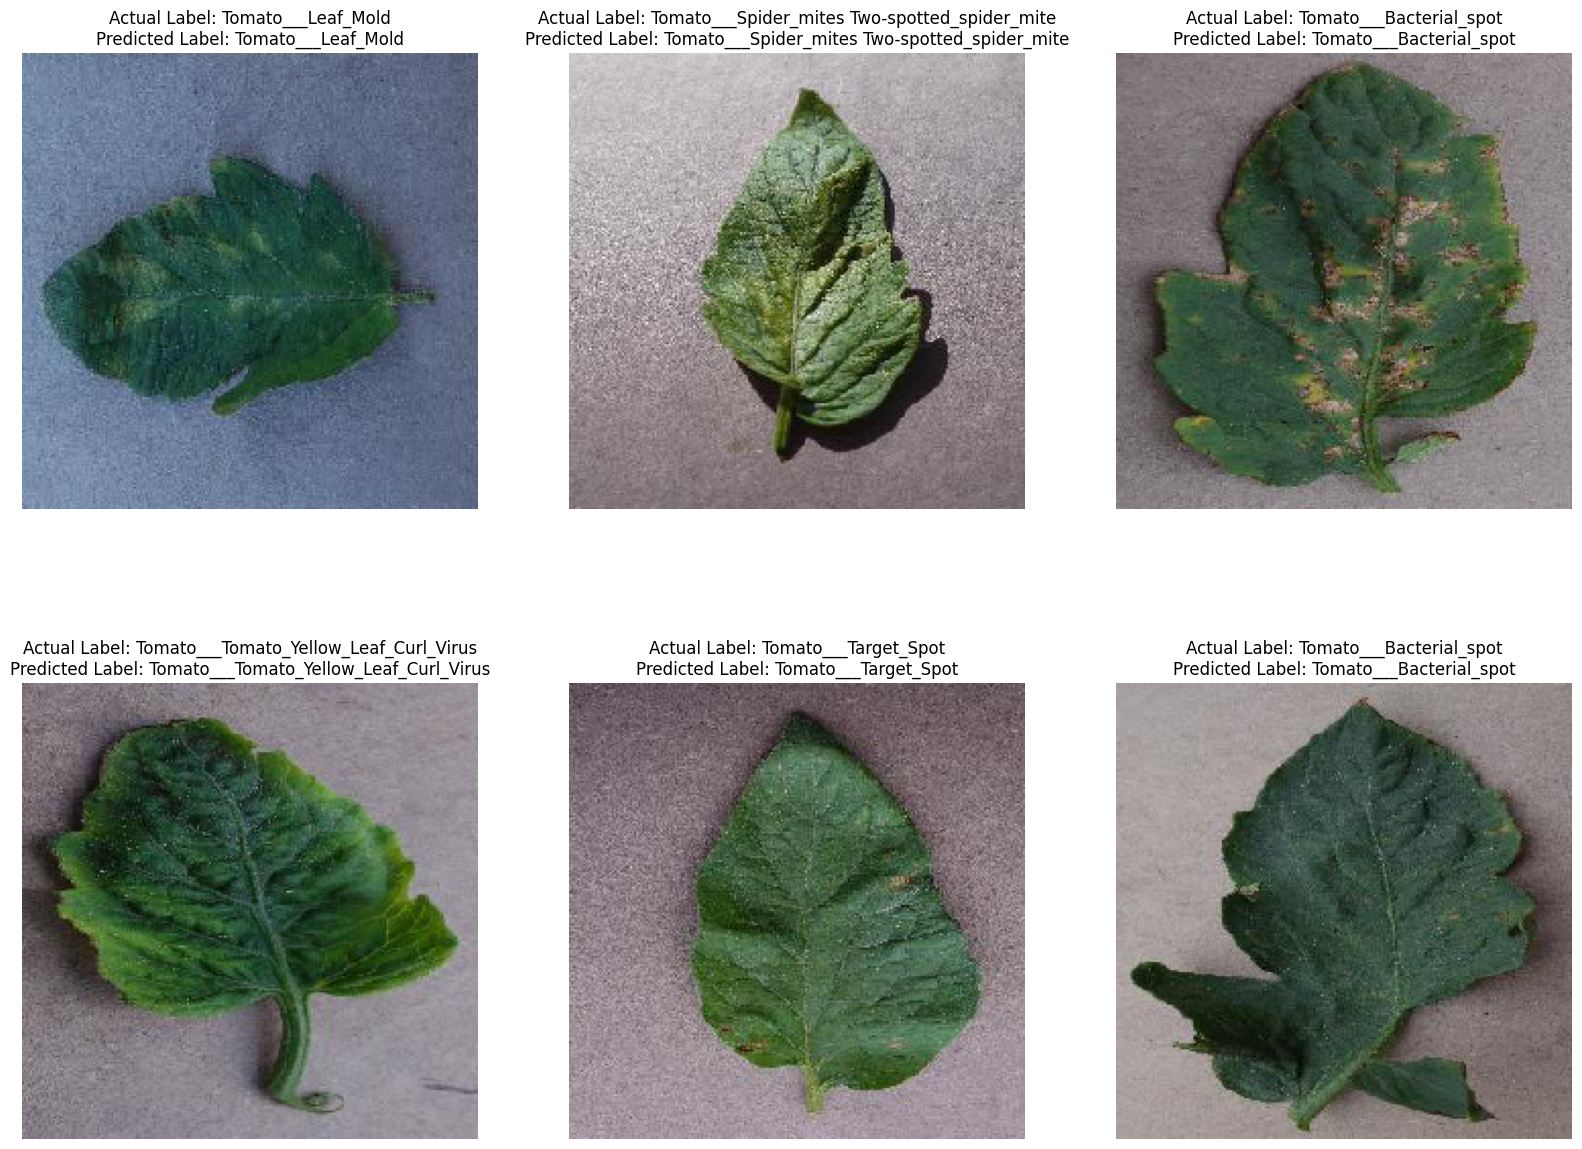

In [28]:
# Sample predictions
predict_image_label(test_data, class_names, model)